# Data Mining Project

## Data Cleaning and Exploring 

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, pairwise_distances
import matplotlib as plt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (StandardScaler, LabelEncoder, PolynomialFeatures)
from scipy.cluster.hierarchy import (dendrogram, linkage, fcluster)
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import (
    silhouette_score, pairwise_distances,
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay,
    roc_curve, auc
)
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
# Cell 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [38]:
test_df=pd.read_csv("C:/Users/NadaF/Downloads/test1.csv")
train_df=pd.read_csv("C:/Users/NadaF/Downloads/train1.csv")
print(train_df.shape)
print(test_df.shape)

(878049, 9)
(884262, 7)


In [39]:
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,13/05/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,13/05/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,13/05/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,13/05/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,13/05/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [40]:
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,10/5/2015 23:59,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,10/5/2015 23:51,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,10/5/2015 23:50,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,10/5/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,10/5/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


* Dates - timestamp of the crime incident
* Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
* Descript - detailed description of the crime incident (only in train.csv)
* DayOfWeek - the day of the week
* PdDistrict - name of the Police Department District
* Resolution - how the crime incident was resolved (only in train.csv)
* Address - the approximate street address of the crime incident
* X - Longitude
* Y - Latitude

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [43]:
test_df=test_df.drop(['Id'],axis=1)
test_df.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,10/5/2015 23:59,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,10/5/2015 23:51,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,10/5/2015 23:50,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,10/5/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,10/5/2015 23:45,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [44]:
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Convert the 'Dates' column to datetime format in case
train_df['Dates'] = pd.to_datetime(train_df['Dates'], dayfirst=True)
test_df['Dates'] = pd.to_datetime(test_df['Dates'], dayfirst=True)

# Extract date and time components for train_df
train_df['Year'] = train_df['Dates'].dt.year
train_df['Month'] = train_df['Dates'].dt.month
train_df['Day'] = train_df['Dates'].dt.day
train_df['Hour'] = train_df['Dates'].dt.hour
train_df['Minute'] = train_df['Dates'].dt.minute
train_df['Second'] = train_df['Dates'].dt.second


# Extract date and time components for test_df
test_df['Year'] = test_df['Dates'].dt.year
test_df['Month'] = test_df['Dates'].dt.month
test_df['Day'] = test_df['Dates'].dt.day
# Extract time components for test_df
test_df['Hour'] = test_df['Dates'].dt.hour
test_df['Minute'] = test_df['Dates'].dt.minute
test_df['Second'] = test_df['Dates'].dt.second


train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute,Second
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


In [45]:
train_df = train_df.drop('Dates', axis=1)
test_df = test_df.drop('Dates', axis=1)

In [46]:
train_df.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Minute,Second
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0


In [47]:
test_df.head()

,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,Minute,Second
0,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,0
1,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,0
2,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,0
3,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0
4,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0


In [48]:
print('trian data\n',train_df.isnull().sum())
print('test data\n',test_df.isnull().sum())

trian data
 Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Year          0
Month         0
Day           0
Hour          0
Minute        0
Second        0
dtype: int64
test data
 DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
Year          0
Month         0
Day           0
Hour          0
Minute        0
Second        0
dtype: int64


In [49]:
print('number of duplicates rows in train ',train_df.duplicated().sum())
print('number of duplicates rows in test ',test_df.duplicated().sum())

number of duplicates rows in train  2323
number of duplicates rows in test  188352


In [50]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

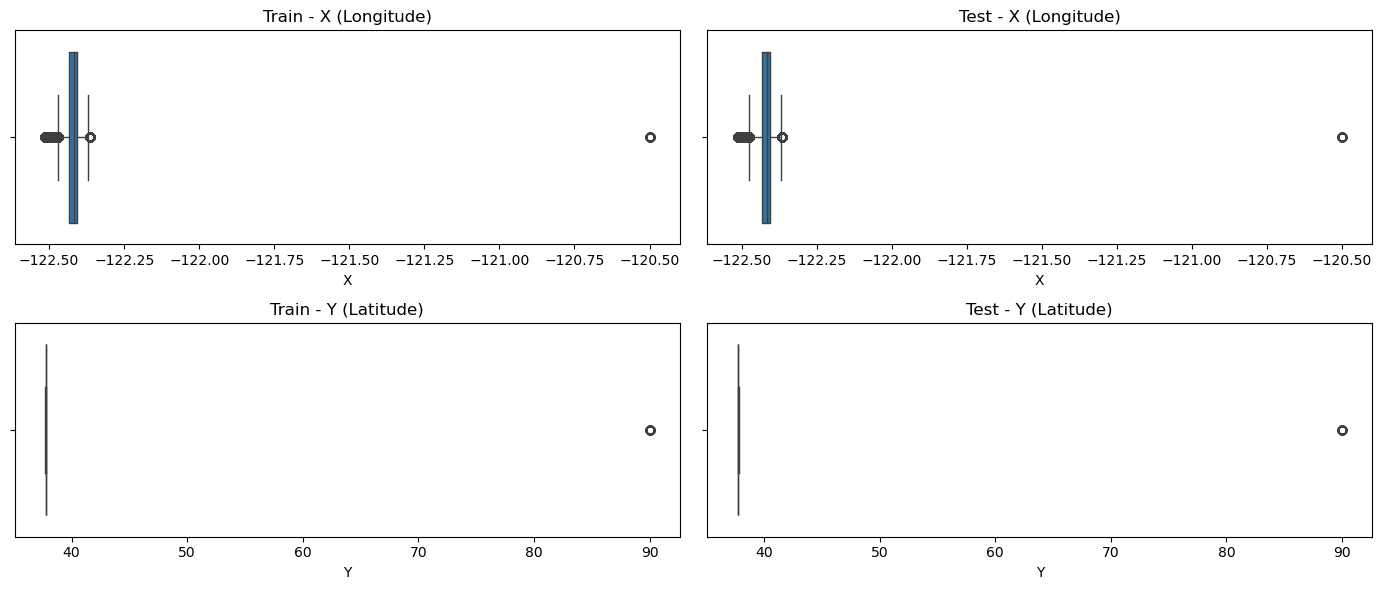

In [51]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x=train_df['X'])
plt.title('Train - X (Longitude)')

plt.subplot(2, 2, 2)
sns.boxplot(x=test_df['X'])
plt.title('Test - X (Longitude)')

plt.subplot(2, 2, 3)
sns.boxplot(x=train_df['Y'])
plt.title('Train - Y (Latitude)')

plt.subplot(2, 2, 4)
sns.boxplot(x=test_df['Y'])
plt.title('Test - Y (Latitude)')

plt.tight_layout()
plt.show()

X,Y coloumns have extreme values on both train and test data 

In [52]:
def detect_outliers(df, columns):

    result_df = df.copy()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        result_df[f'{col}_outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    return result_df

In [53]:
train_with_outliers = detect_outliers(train_df, ['X', 'Y'])
test_with_outliers = detect_outliers(test_df, ['X', 'Y']) 

In [54]:
# Create flags for points that are outliers in both x and y
train_with_outliers['both_outlier'] = train_with_outliers['X_outlier'] & train_with_outliers['Y_outlier']
test_with_outliers['both_outlier'] = test_with_outliers['X_outlier'] & test_with_outliers['Y_outlier']

In [55]:
# Get the outlier points for comparison
train_outliers = train_with_outliers[train_with_outliers['both_outlier']][['X', 'Y']]
test_outliers = test_with_outliers[test_with_outliers['both_outlier']][['X', 'Y']]
print(f"Train outliers count: {len(train_outliers)}")
print(f"Test outliers count: {len(test_outliers)}")

Train outliers count: 67
Test outliers count: 54


In [56]:
# Check if there are common outlier values between train and test
common_outliers = pd.merge(train_outliers, test_outliers, on=['X', 'Y'], how='inner')
print(f"Common outlier points between train and test: {len(common_outliers)}")

if not common_outliers.empty:
    print("Common outlier values:")
    print(common_outliers)

Common outlier points between train and test: 3618
Common outlier values:
          X     Y
0    -120.5  90.0
1    -120.5  90.0
2    -120.5  90.0
3    -120.5  90.0
4    -120.5  90.0
...     ...   ...
3613 -120.5  90.0
3614 -120.5  90.0
3615 -120.5  90.0
3616 -120.5  90.0
3617 -120.5  90.0

[3618 rows x 2 columns]


all outliers have the same value

In [57]:
def remove_outliers(df, outlier_flag_col):
    """
    Remove rows where the outlier flag is True
    """
    return df[~df[outlier_flag_col]]

# Drop the outliers
train_clean = remove_outliers(train_with_outliers, 'both_outlier')
test_clean = remove_outliers(test_with_outliers, 'both_outlier')


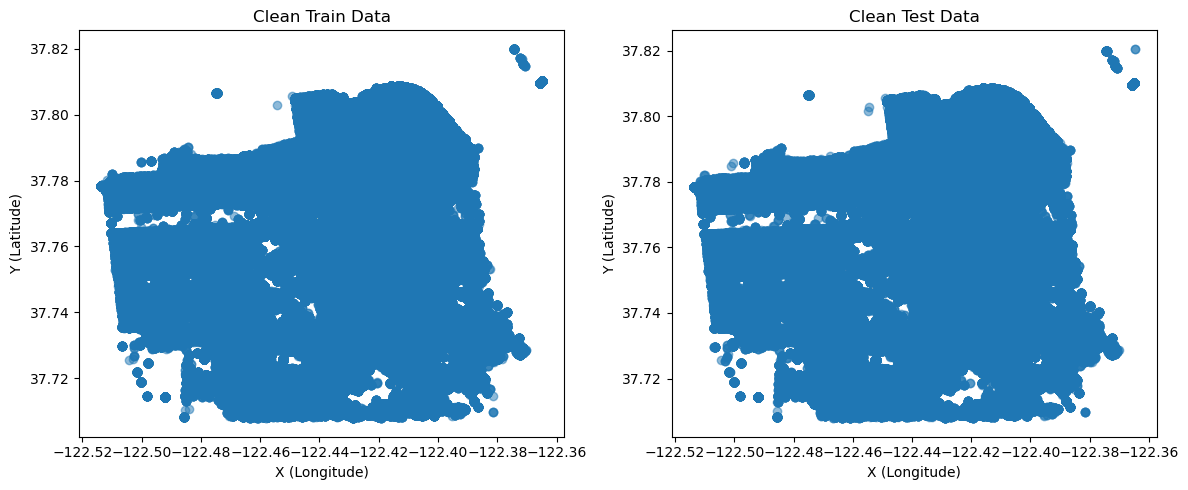

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_clean['X'], train_clean['Y'], alpha=0.5)
plt.title('Clean Train Data')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')

plt.subplot(1, 2, 2)
plt.scatter(test_clean['X'], test_clean['Y'], alpha=0.5)
plt.title('Clean Test Data')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')

plt.tight_layout()
plt.show()

## Hierarchical Clustering

In this section of the project, we applied the **Hierarchical Clustering**:algorithm to analyze and segment crime data based on geographic location and time. The main goal of this step is to identify spatial and temporal patterns that may help in predicting future crime occurrences.

### Train Data Preparation for Hierarchical Clustering

In this step, we selected key features for clustering:
- Geographic: `X`, `Y`
- Time-based: `Hour`, `Day`, `Month`

Then we normalized the values using `StandardScaler` to ensure that differences in units do not affect clustering.  
A sample of 5000 records was taken to make processing more efficient and reduce memory usage.

In [59]:
features = ['X', 'Y', 'Hour', 'Day', 'Month']

In [60]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_clean[features])

In [61]:
# Take a sample to reduce processing load
sampled_df = train_clean.sample(n=5000, random_state=42)  
data_scaled_sample = scaler.fit_transform(sampled_df[features])

### Dendrogram

We used the `linkage` function with the `ward` method to build a hierarchical tree structure that represents data similarity.  
Then, we visualized the structure using a **Dendrogram** to observe distances between data points and determine an appropriate number of clusters.


In [62]:
linked = linkage(data_scaled_sample, method='ward')

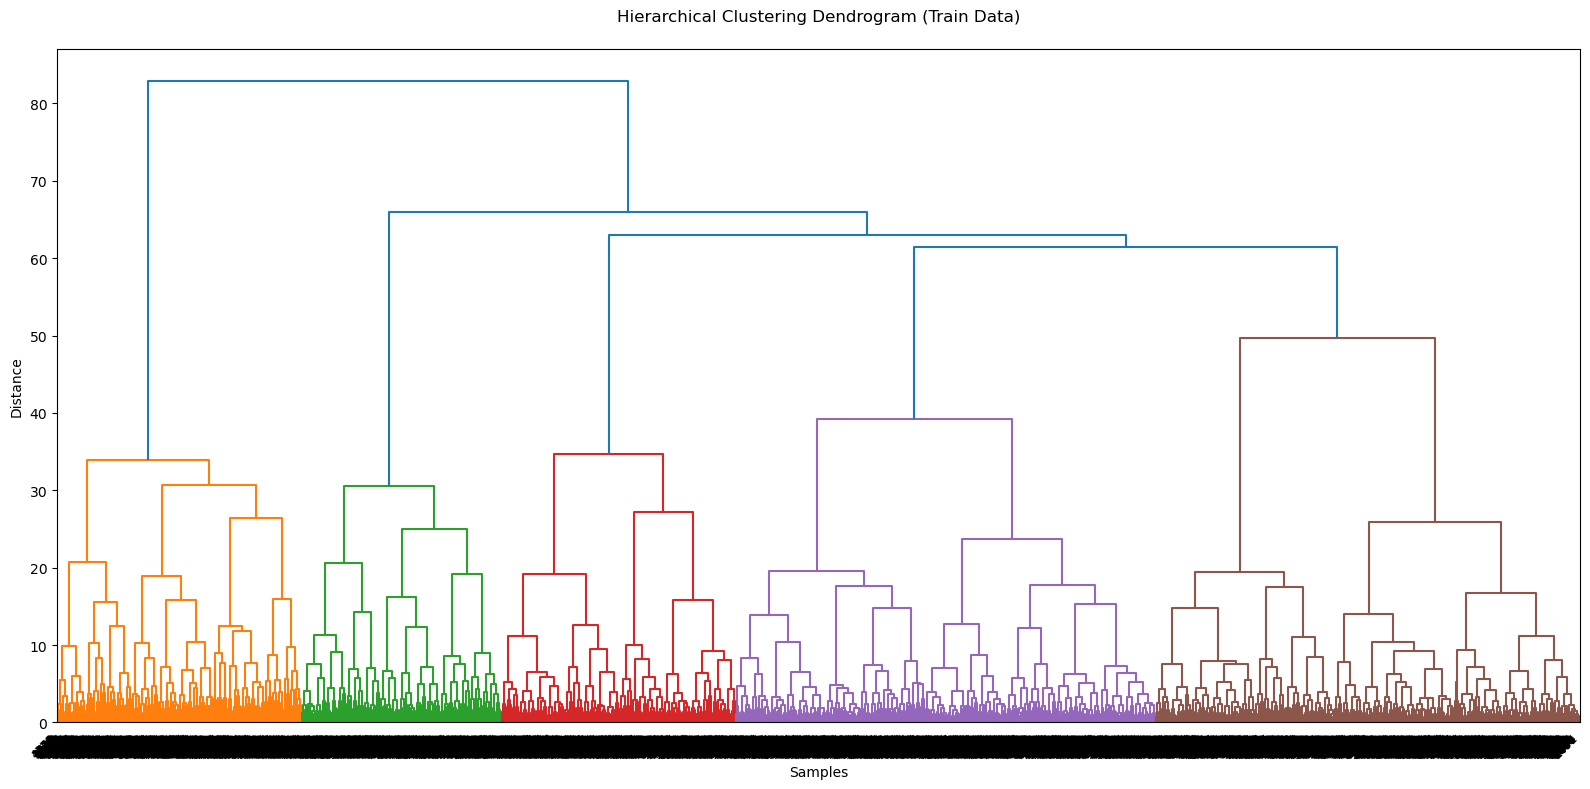

In [63]:
plt.figure(figsize=(16, 8), facecolor='white')
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False,
           leaf_rotation=45)

plt.title('Hierarchical Clustering Dendrogram (Train Data)', pad=20)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(False)

ax = plt.gca()
ax.set_facecolor('white')

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

### Cluster Assignment and Visualization (Training Data)

Based on the Dendrogram, we selected **4 clusters**.  
We used `fcluster` to assign each point to a cluster, and then visualized the results using `seaborn` to understand how crimes are spatially distributed.

In [64]:
num_clusters = 4
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

In [65]:
sampled_df['Cluster'] = cluster_labels

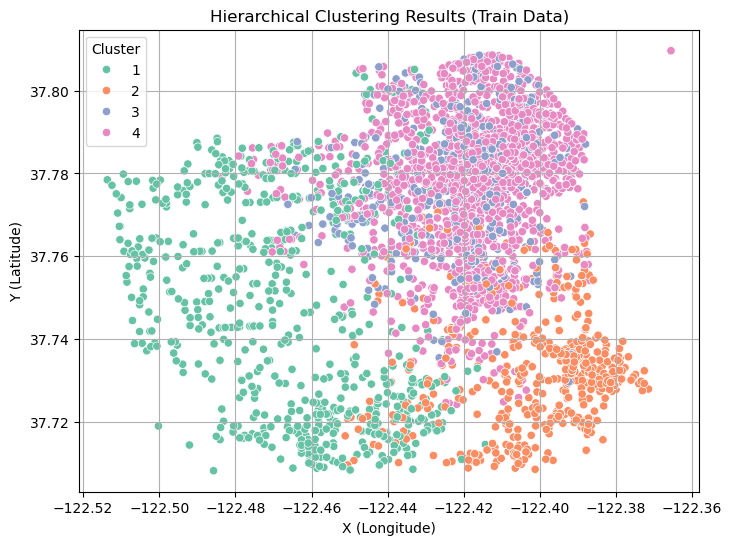

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sampled_df, x='X', y='Y', hue='Cluster', palette='Set2')
plt.title('Hierarchical Clustering Results (Train Data)')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

###  Test Data Preparation

The same preprocessing steps were repeated for the train dataset:  
- Selected the same features.
- Applied normalization using `StandardScaler`.
- Took a sample of 5000 records to evaluate the clustering model efficiently.

In [67]:
features = ['X', 'Y', 'Hour', 'Day', 'Month']

In [68]:
scaler = StandardScaler()
data_scaled_test = scaler.fit_transform(test_clean[features])

In [69]:
sampled_test_df = test_clean.sample(n=5000, random_state=42)
data_scaled_sample_test = scaler.fit_transform(sampled_test_df[features])

###  Dendrogram (Test Data)

A similar `Dendrogram` was created for the test dataset to verify clustering structure and consistency.

In [70]:
linked_test = linkage(data_scaled_sample_test, method='ward')

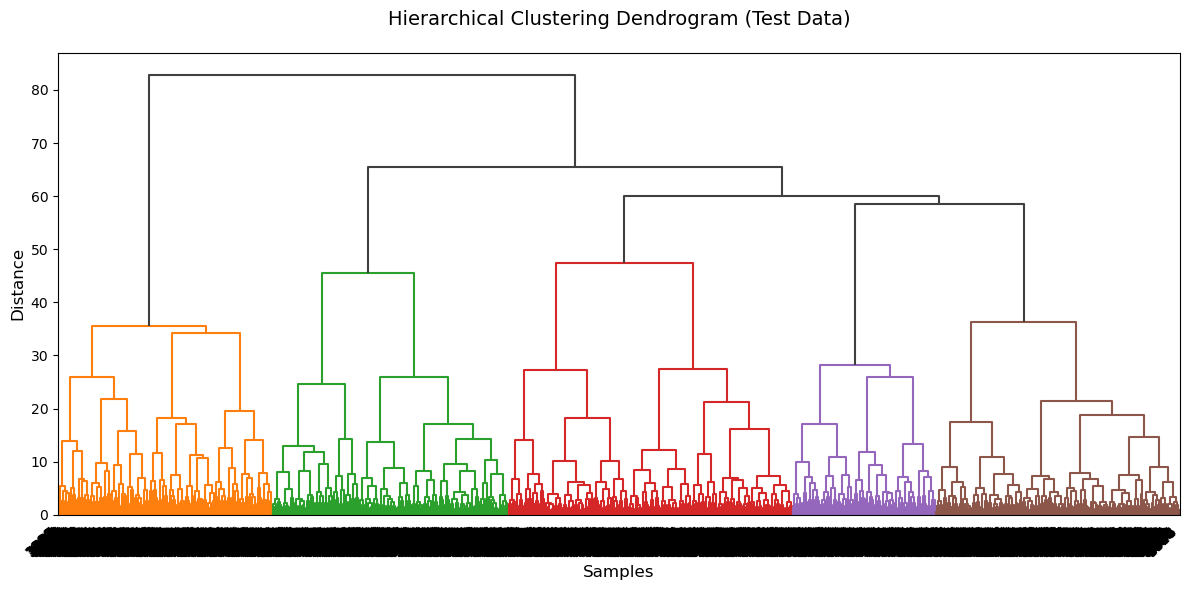

In [71]:
plt.figure(figsize=(12, 6), facecolor='white') 
dendrogram(linked_test,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False,
           above_threshold_color='#404040') 
plt.title('Hierarchical Clustering Dendrogram (Test Data)', pad=20, fontsize=14)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Distance', fontsize=12)

ax = plt.gca()
ax.set_facecolor('white') 

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

###  Cluster and Visualization (Testing Data)

We used the same number of clusters (4) on the test data.  
The results were visualized using `seaborn` to check how consistent the clustering behavior is across different datasets.


In [72]:
num_clusters_test = 4
cluster_labels_test = fcluster(linked_test, num_clusters_test, criterion='maxclust')

In [73]:
sampled_test_df['Cluster'] = cluster_labels_test

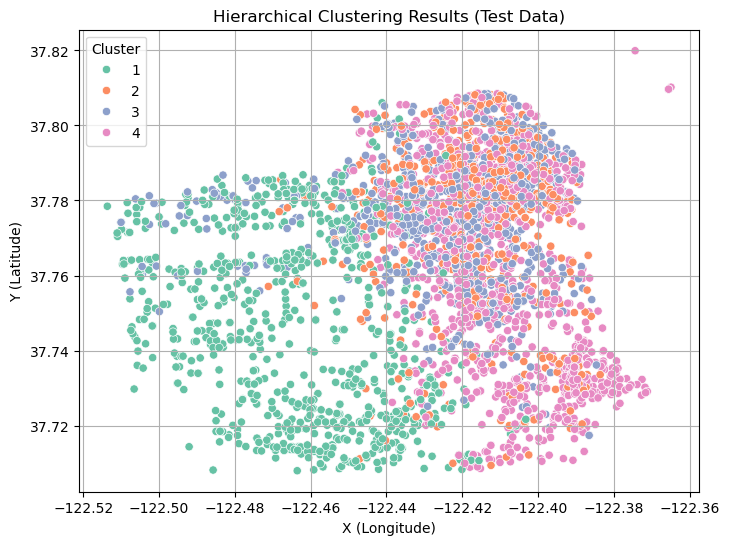

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sampled_test_df, x='X', y='Y', hue='Cluster', palette='Set2')
plt.title('Hierarchical Clustering Results (Test Data)')
plt.xlabel('X (Longitude)')
plt.ylabel('Y (Latitude)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## K-medoid Clustering

 Here k-medoid clustring will be applied but first best k should be determined so firstly k- medoid algorithm will be applied on a sample of the data after that this sample will be increased untill best k is determined 

C:\Users\NadaF\AppData\Local\Temp\ipykernel_29528\2564904177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Category_Encoded'] = LabelEncoder().fit_transform(train_clean['Category'])


k = 2...
Silhouette Score لـ k=2: 0.2035
k = 3...
Silhouette Score لـ k=3: 0.2125
k = 4...
Silhouette Score لـ k=4: 0.2406
k = 5...
Silhouette Score لـ k=5: 0.2590
k = 6...
Silhouette Score لـ k=6: 0.2236
k = 7...
Silhouette Score لـ k=7: 0.2182

🎯best k is k = 5 (Score = 0.2590)


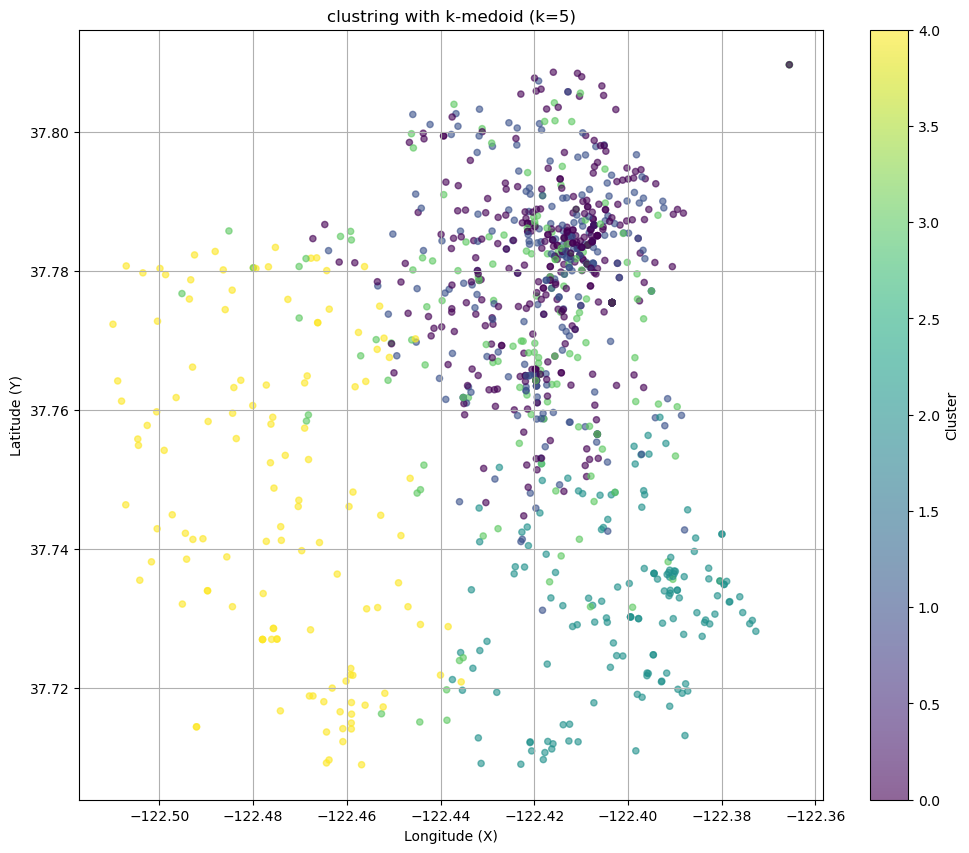

In [ ]:
train_clean['Category_Encoded'] = LabelEncoder().fit_transform(train_clean['Category'])

features = train_clean[['X', 'Y', 'Hour', 'Category_Encoded']].copy()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

sample_size = 1000 
sample_indices = np.random.choice(len(features_scaled), sample_size, replace=False)
sample_data = features_scaled[sample_indices]

best_k = 0
best_score = -1
best_labels = None

for k in range(2, 8):  
    print(f"k = {k}...")
    kmedoids = KMedoids(n_clusters=k, method='pam', init='k-medoids++', random_state=42)
    labels = kmedoids.fit_predict(sample_data)
    
    score = silhouette_score(sample_data, labels)
    print(f"Silhouette Score لـ k={k}: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f"\n🎯best k is k = {best_k} (Score = {best_score:.4f})")

sample_df = train_clean.iloc[sample_indices].copy()
sample_df['Cluster'] = best_labels

plt.figure(figsize=(12, 10))
plt.scatter(sample_df['X'], sample_df['Y'], c=sample_df['Cluster'], cmap='viridis', alpha=0.6, s=20)
plt.title(f"clustring with k-medoid (k={best_k})")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

C:\Users\NadaF\AppData\Local\Temp\ipykernel_29528\3928338864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Category_Encoded'] = LabelEncoder().fit_transform(train_clean['Category'])


k = 2...
Silhouette Score لـ k=2: 0.1842
k = 3...
Silhouette Score لـ k=3: 0.2027
k = 4...
Silhouette Score لـ k=4: 0.2254
k = 5...
Silhouette Score لـ k=5: 0.2360
k = 6...
Silhouette Score لـ k=6: 0.2184
k = 7...
Silhouette Score لـ k=7: 0.2199

🎯 best k is k = 5 (Score = 0.2360)


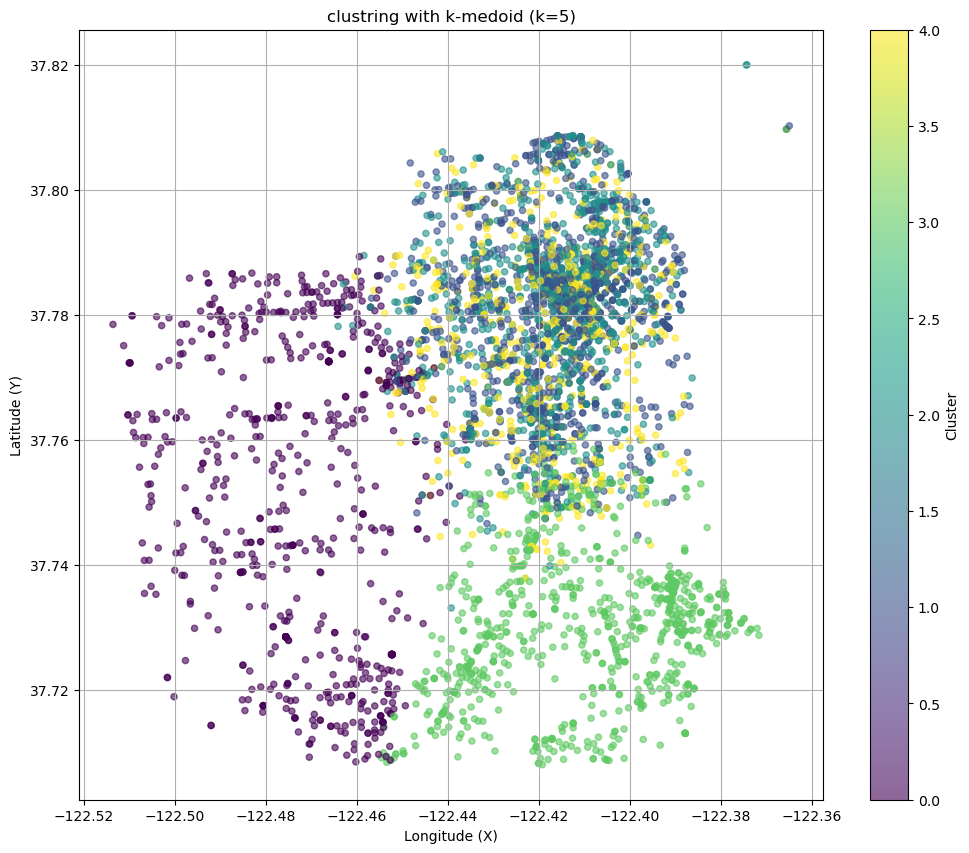

In [76]:
train_clean['Category_Encoded'] = LabelEncoder().fit_transform(train_clean['Category'])
features = train_clean[['X', 'Y', 'Hour', 'Category_Encoded']].copy()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
sample_size = 5000 
sample_indices = np.random.choice(len(features_scaled), sample_size, replace=False)
sample_data = features_scaled[sample_indices]
best_k = 0
best_score = -1
best_labels = None

for k in range(2, 8):  
    print(f"k = {k}...")
    kmedoids = KMedoids(n_clusters=k, method='pam', init='k-medoids++', random_state=42)
    labels = kmedoids.fit_predict(sample_data)
    
    score = silhouette_score(sample_data, labels)
    print(f"Silhouette Score لـ k={k}: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels
print(f"\n🎯 best k is k = {best_k} (Score = {best_score:.4f})")

sample_df = train_clean.iloc[sample_indices].copy()
sample_df['Cluster'] = best_labels

plt.figure(figsize=(12, 10))
plt.scatter(sample_df['X'], sample_df['Y'], c=sample_df['Cluster'], cmap='viridis', alpha=0.6, s=20)
plt.title(f"clustring with k-medoid (k={best_k})")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

C:\Users\NadaF\AppData\Local\Temp\ipykernel_29528\3021641482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Category_Encoded'] = LabelEncoder().fit_transform(train_clean['Category'])


جرب k = 2...
Silhouette Score لـ k=2: 0.1866
جرب k = 3...
Silhouette Score لـ k=3: 0.2068
جرب k = 4...
Silhouette Score لـ k=4: 0.2129
جرب k = 5...
Silhouette Score لـ k=5: 0.2213
جرب k = 6...
Silhouette Score لـ k=6: 0.2230
جرب k = 7...
Silhouette Score لـ k=7: 0.2029

🎯 best k is k = 6 (Score = 0.2230)


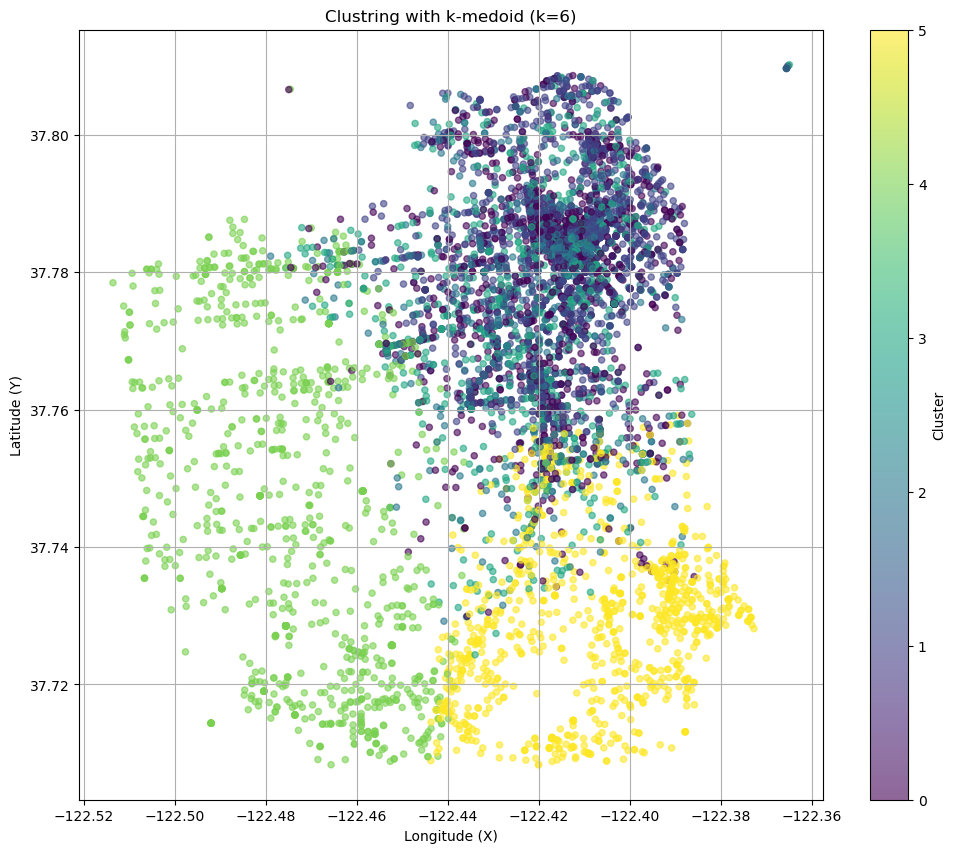

In [77]:
train_clean['Category_Encoded'] = LabelEncoder().fit_transform(train_clean['Category'])
features = train_clean[['X', 'Y', 'Hour', 'Category_Encoded']].copy()
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
sample_size = 7000  
sample_indices = np.random.choice(len(features_scaled), sample_size, replace=False)
sample_data = features_scaled[sample_indices]
best_k = 0
best_score = -1
best_labels = None

for k in range(2, 8):  
    print(f"جرب k = {k}...")
    kmedoids = KMedoids(n_clusters=k, method='pam', init='k-medoids++', random_state=42)
    labels = kmedoids.fit_predict(sample_data)
    
    score = silhouette_score(sample_data, labels)
    print(f"Silhouette Score لـ k={k}: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f"\n🎯 best k is k = {best_k} (Score = {best_score:.4f})")

sample_df = train_clean.iloc[sample_indices].copy()
sample_df['Cluster'] = best_labels

plt.figure(figsize=(12, 10))
plt.scatter(sample_df['X'], sample_df['Y'], c=sample_df['Cluster'], cmap='viridis', alpha=0.6, s=20)
plt.title(f"Clustring with k-medoid (k={best_k})")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

In [78]:
print("Number of clusters :", sample_df['Cluster'].nunique())
print("Number of data in each cluster ")
print(sample_df['Cluster'].value_counts())

Number of clusters : 6
Number of data in each cluster 
Cluster
1    1651
0    1352
5    1073
4     978
2     976
3     970
Name: count, dtype: int64


 Based on previous codes best k is 5 so we have 5 clusters, now we want to assign all data points to these 5 clusters based on their distances 

In [79]:
kmedoids = KMedoids(n_clusters=best_k, method='pam', init='k-medoids++', random_state=42)
kmedoids.fit(sample_data)  
centers = kmedoids.cluster_centers_  

def assign_clusters(data, centers, chunk_size=50000):
    clusters = []
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i + chunk_size]
        distances = pairwise_distances(chunk, centers, metric='euclidean')
        chunk_clusters = np.argmin(distances, axis=1)
        clusters.extend(chunk_clusters)
    return np.array(clusters)
full_data_scaled = scaler.transform(train_clean[['X', 'Y', 'Hour', 'Category_Encoded']])
all_clusters = assign_clusters(full_data_scaled, centers)

In [80]:
print("Number of clusters", len(np.unique(all_clusters)))
print("Data points in each cluster: ")
print(pd.Series(all_clusters).value_counts())

Number of clusters 6
Data points in each cluster: 
1    218752
0    165916
5    136193
2    120061
4    117800
3    116937
Name: count, dtype: int64


In [81]:
train_clean['Cluster'] = all_clusters

C:\Users\NadaF\AppData\Local\Temp\ipykernel_29528\1575098377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['Cluster'] = all_clusters


In [82]:
print(train_clean['Cluster'].value_counts())

Cluster
1    218752
0    165916
5    136193
2    120061
4    117800
3    116937
Name: count, dtype: int64


 Now each cluter will be analyzed:

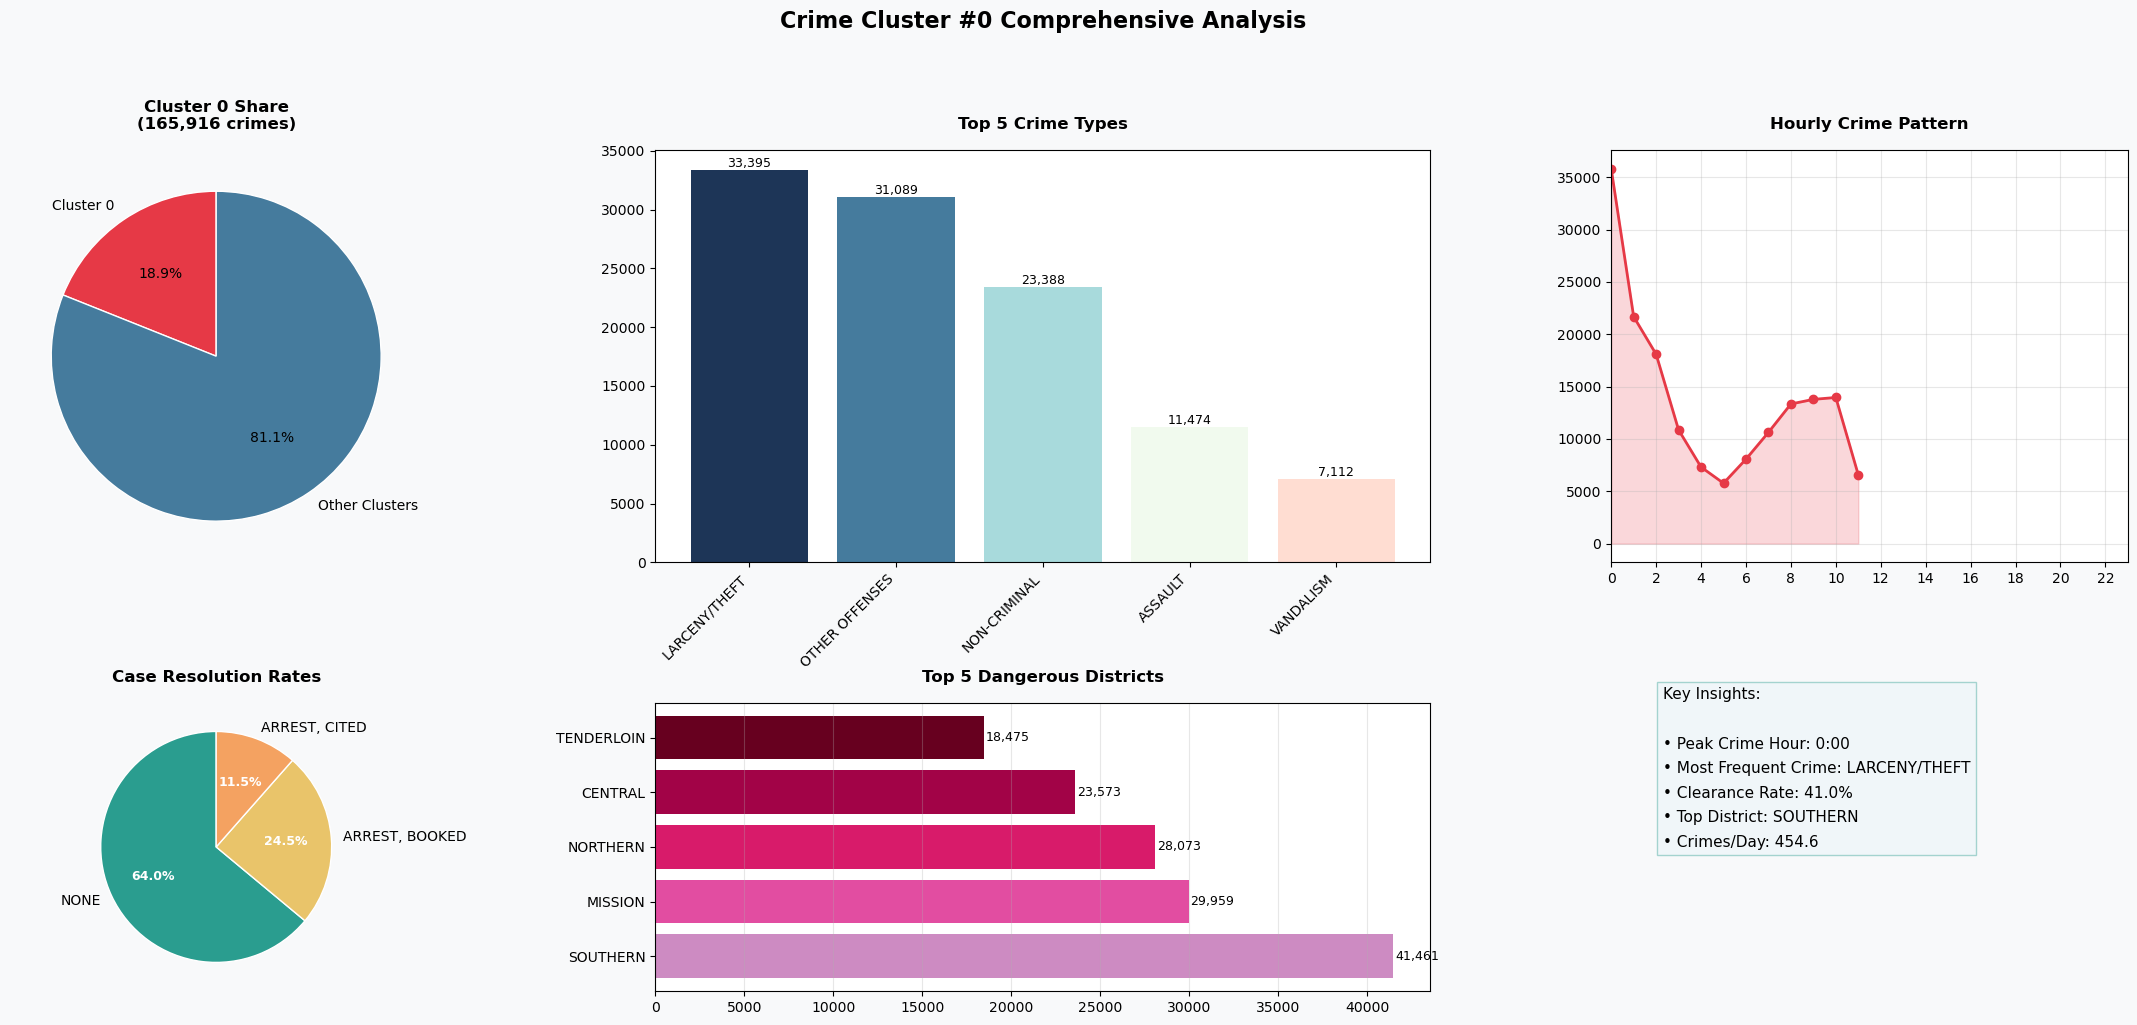

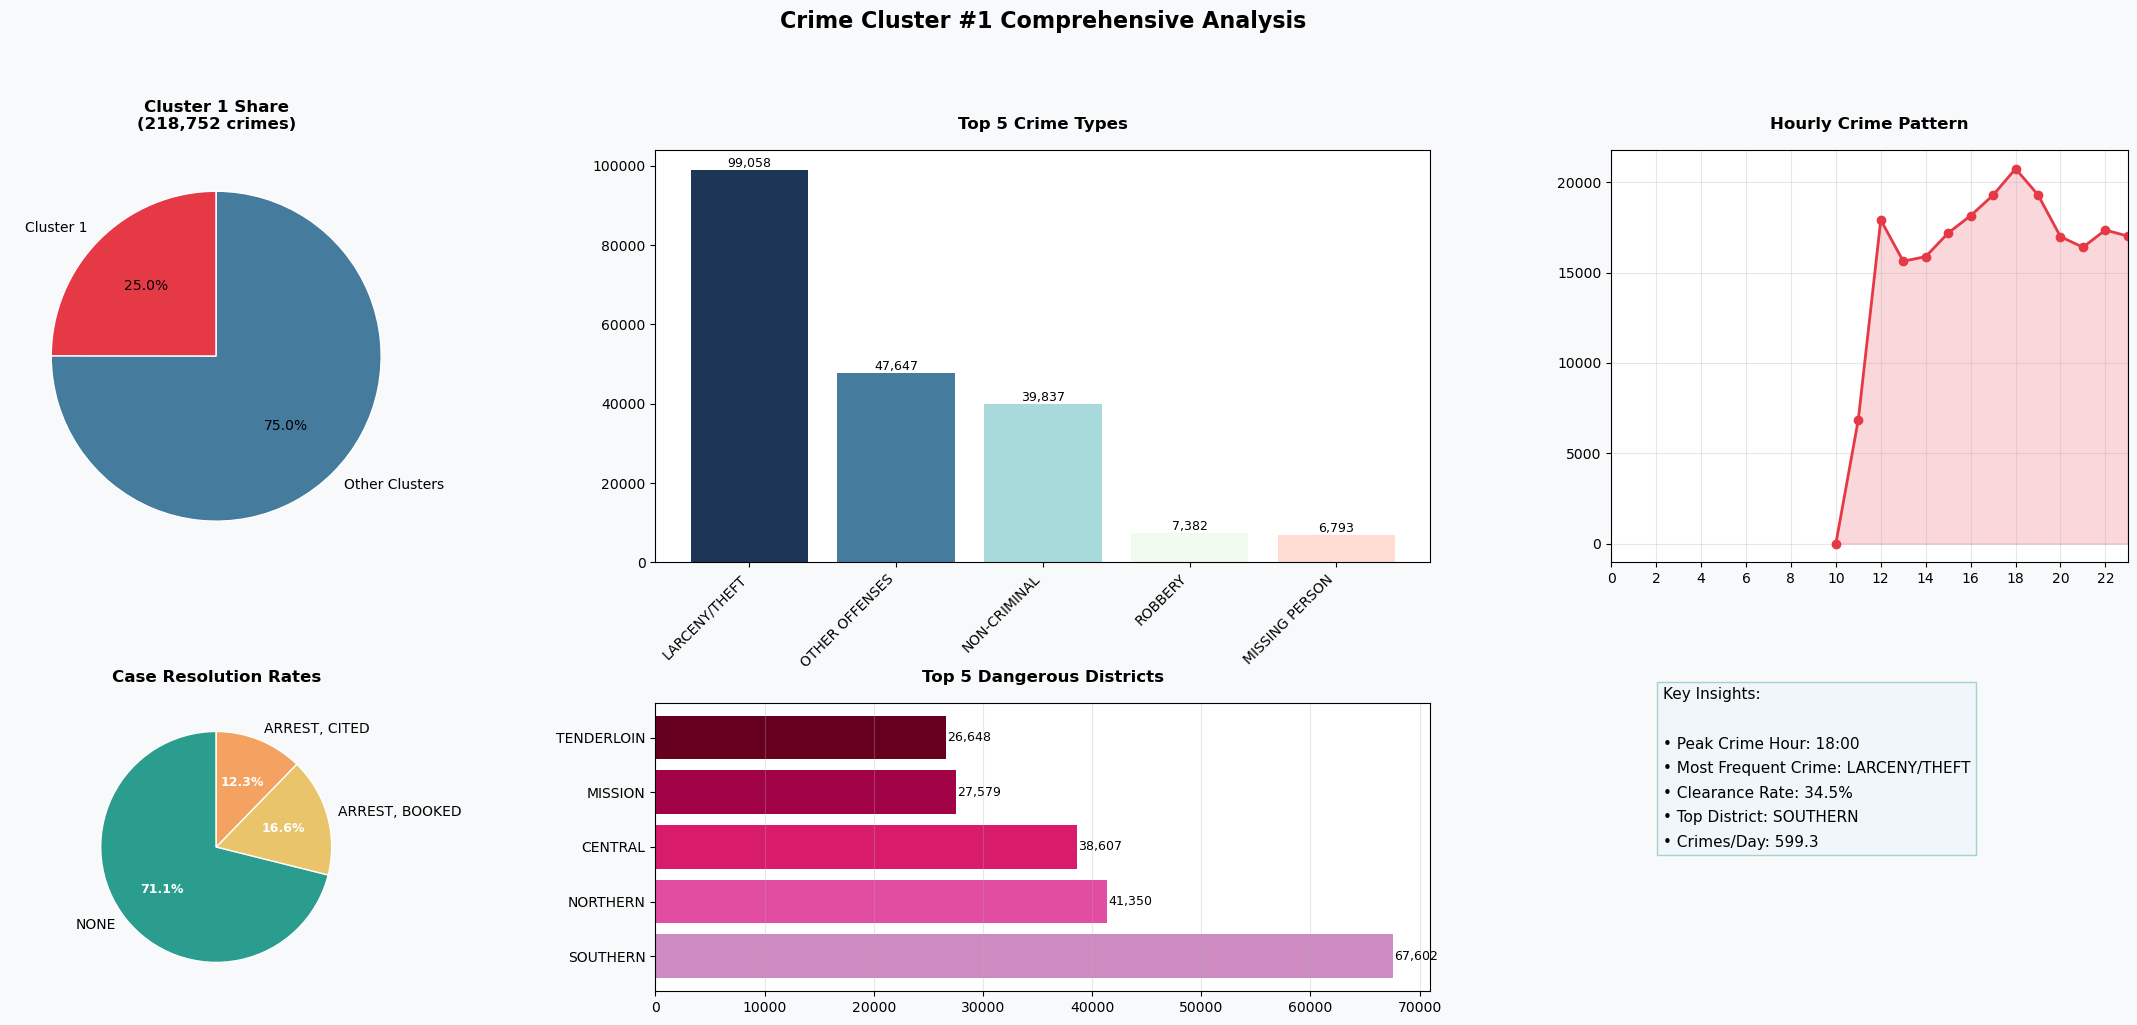

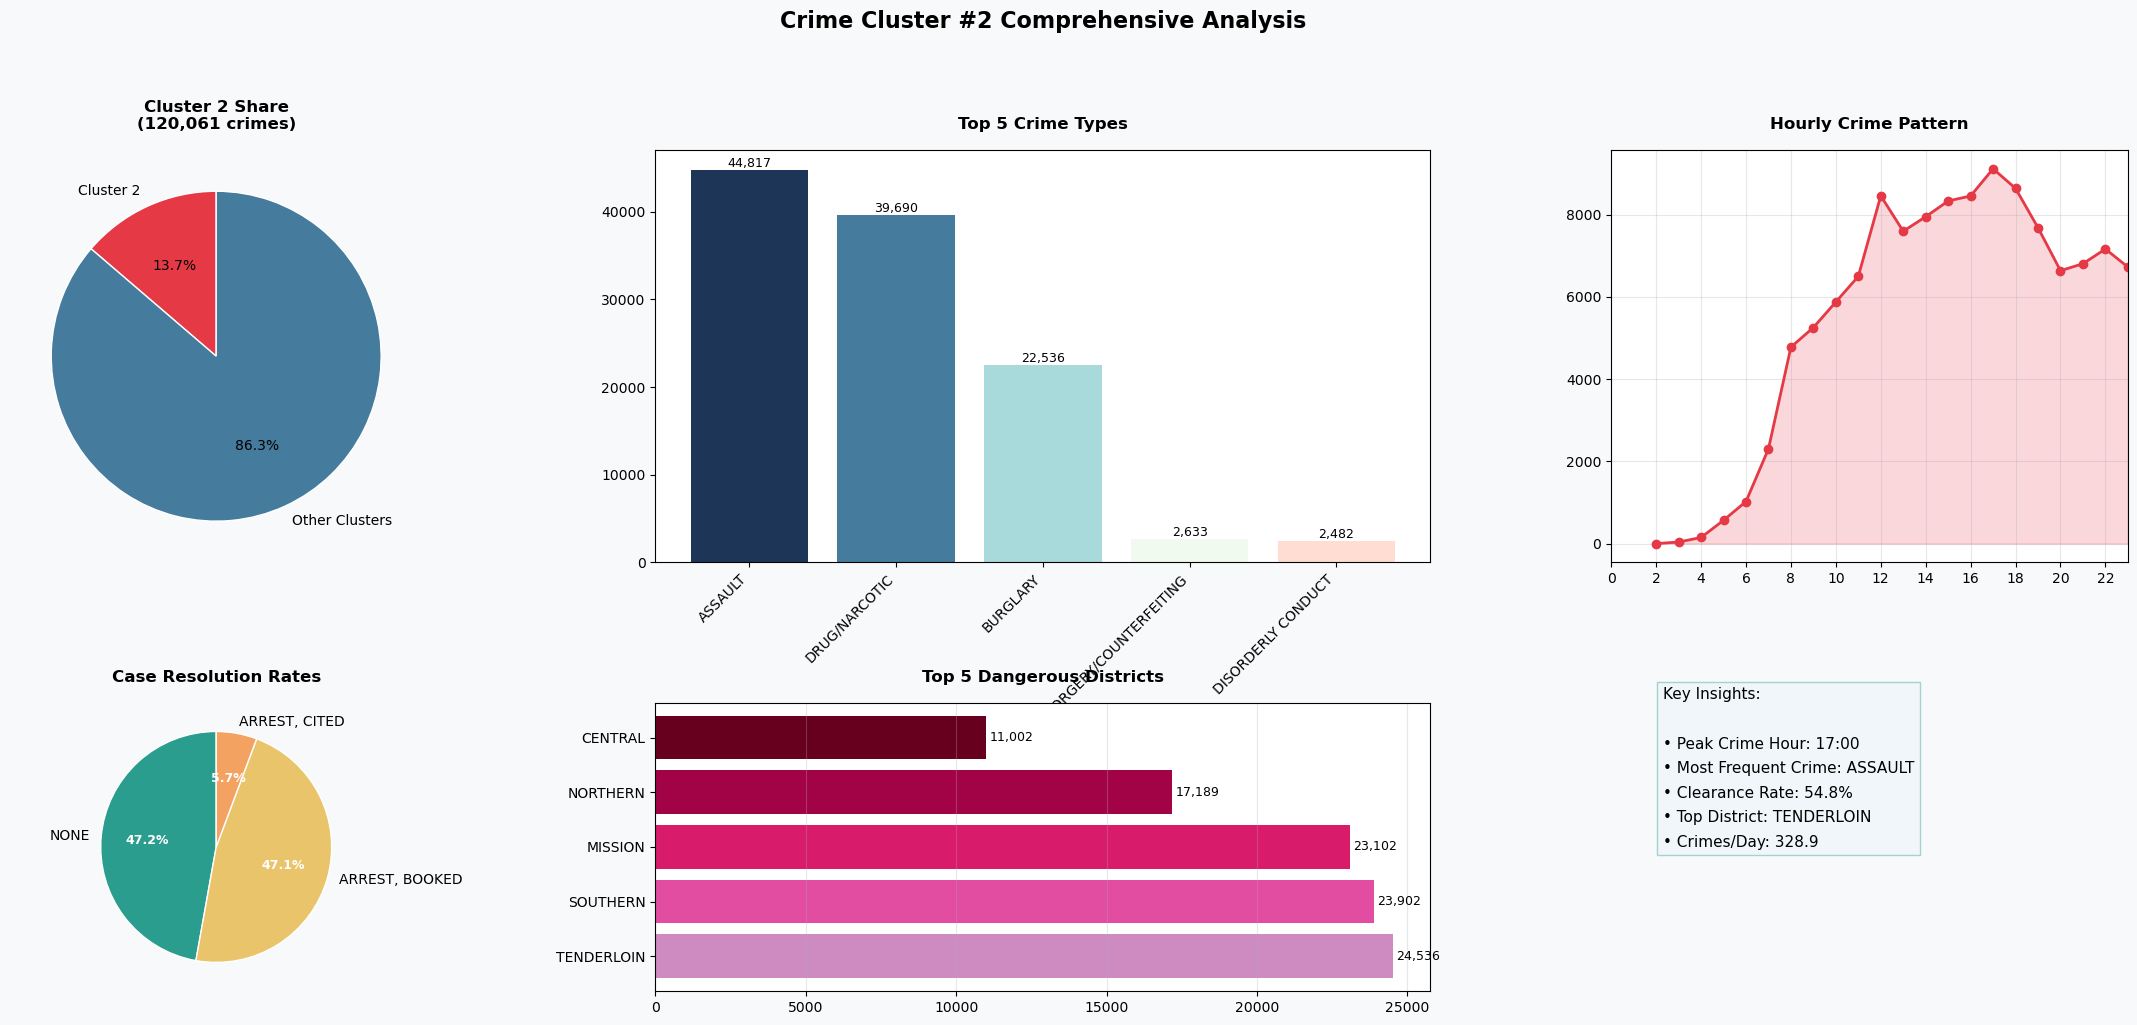

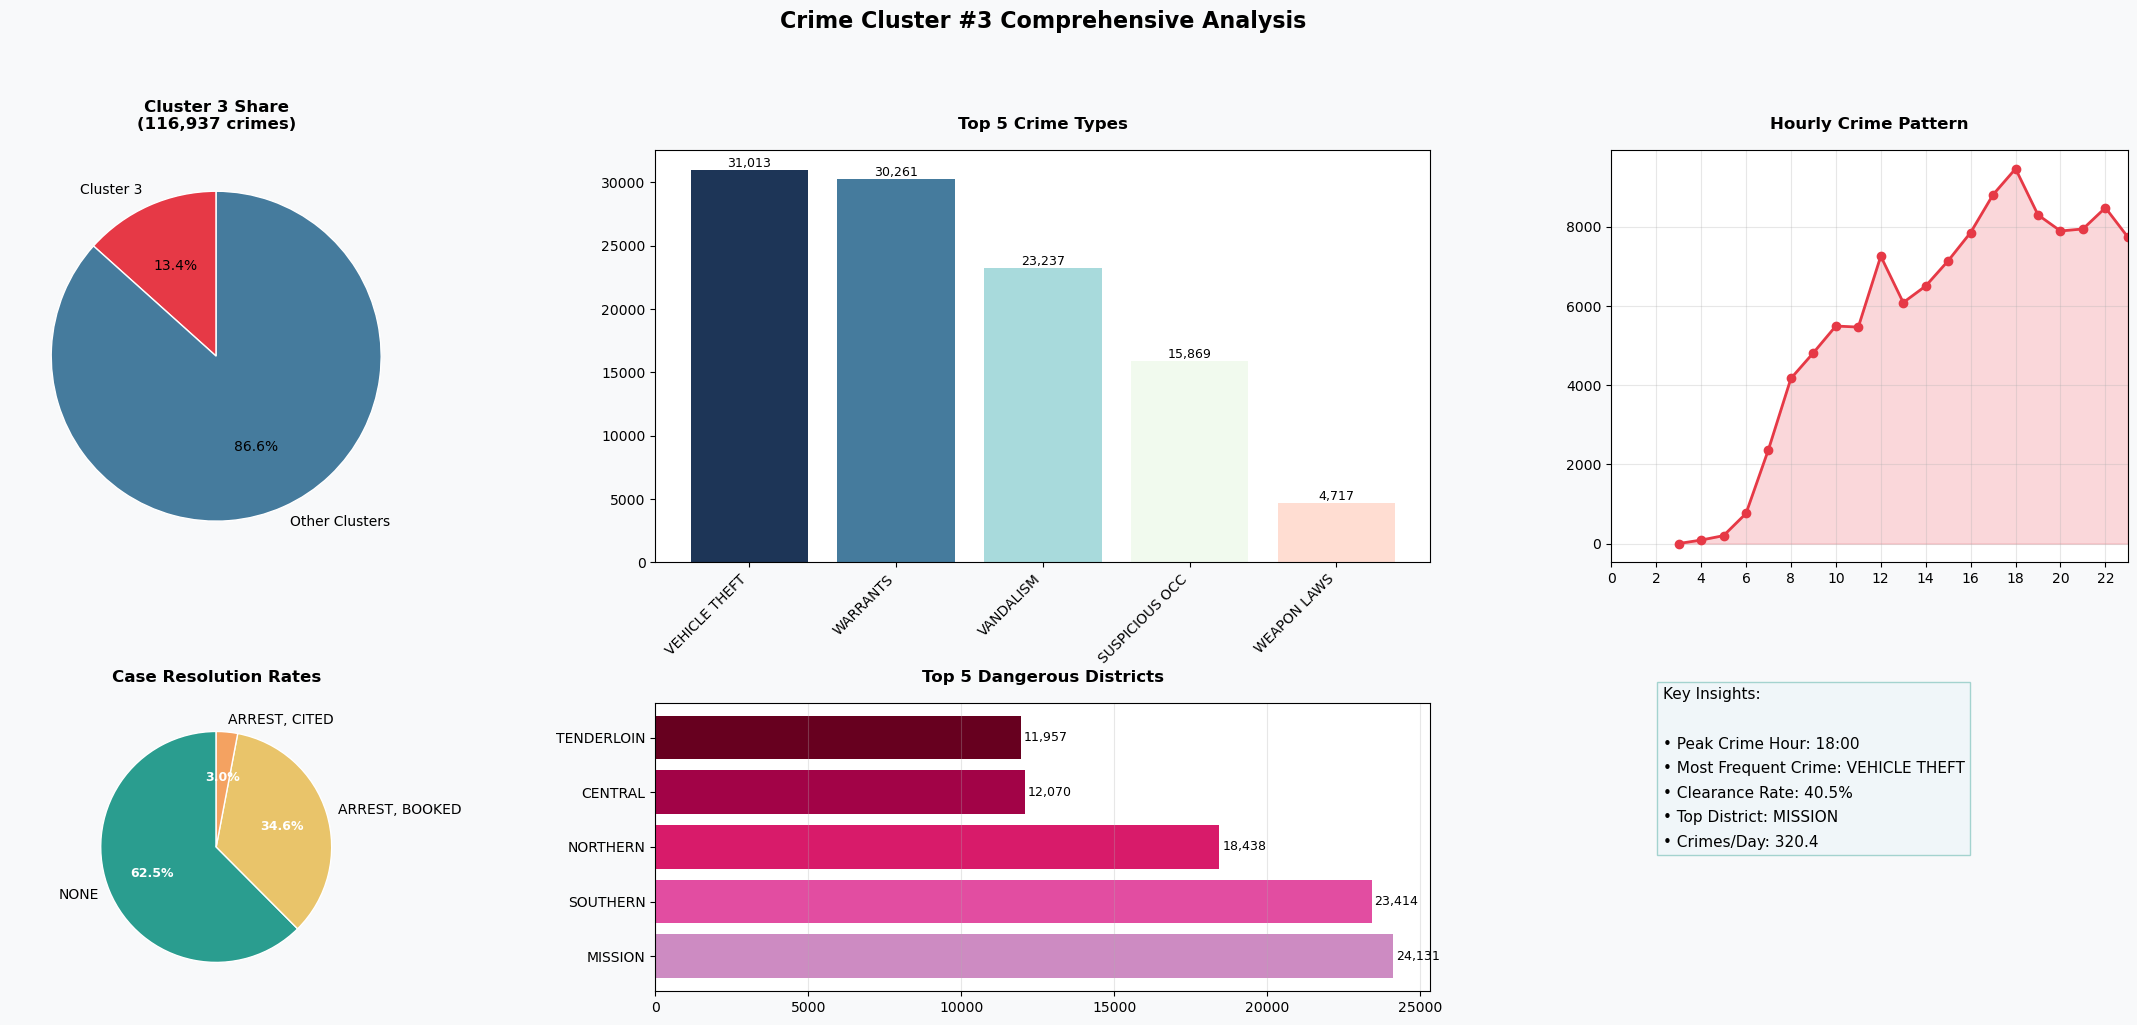

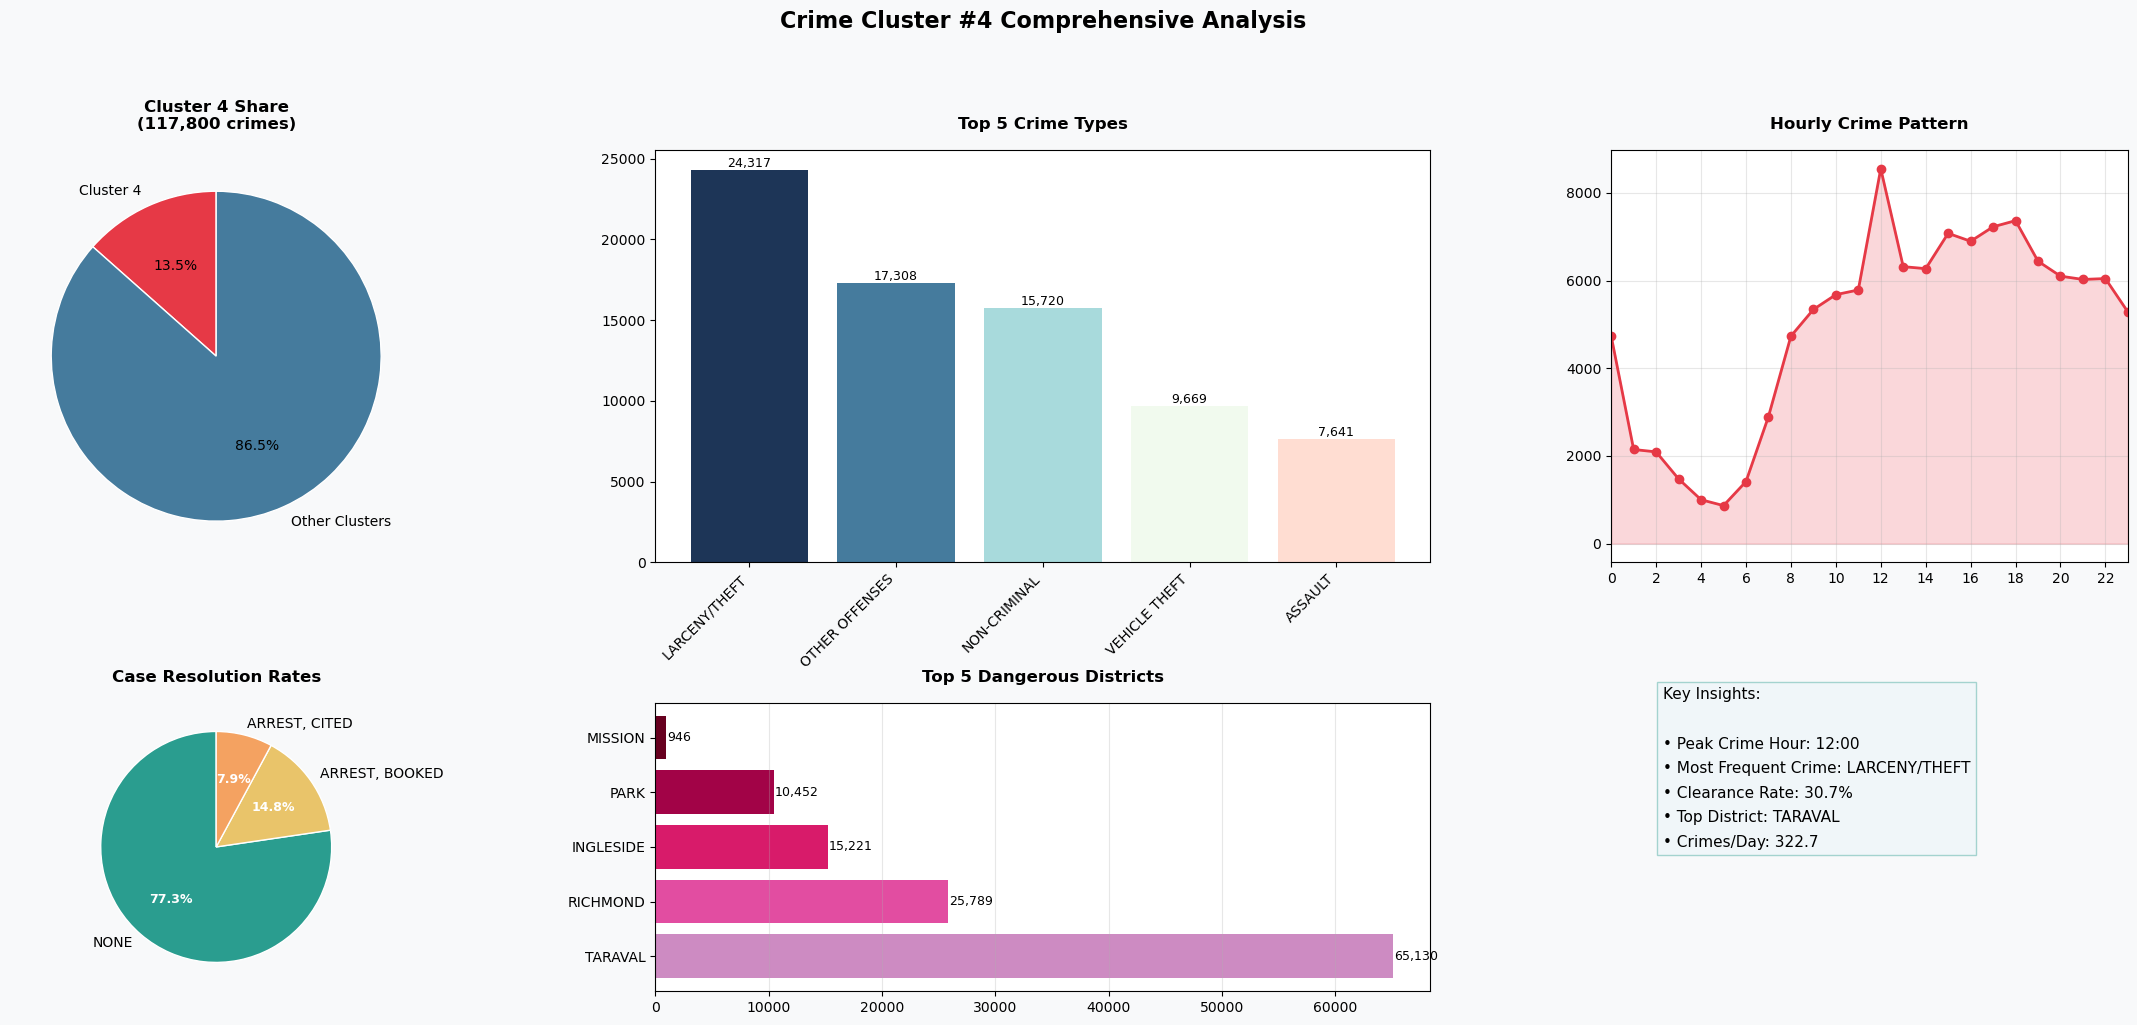

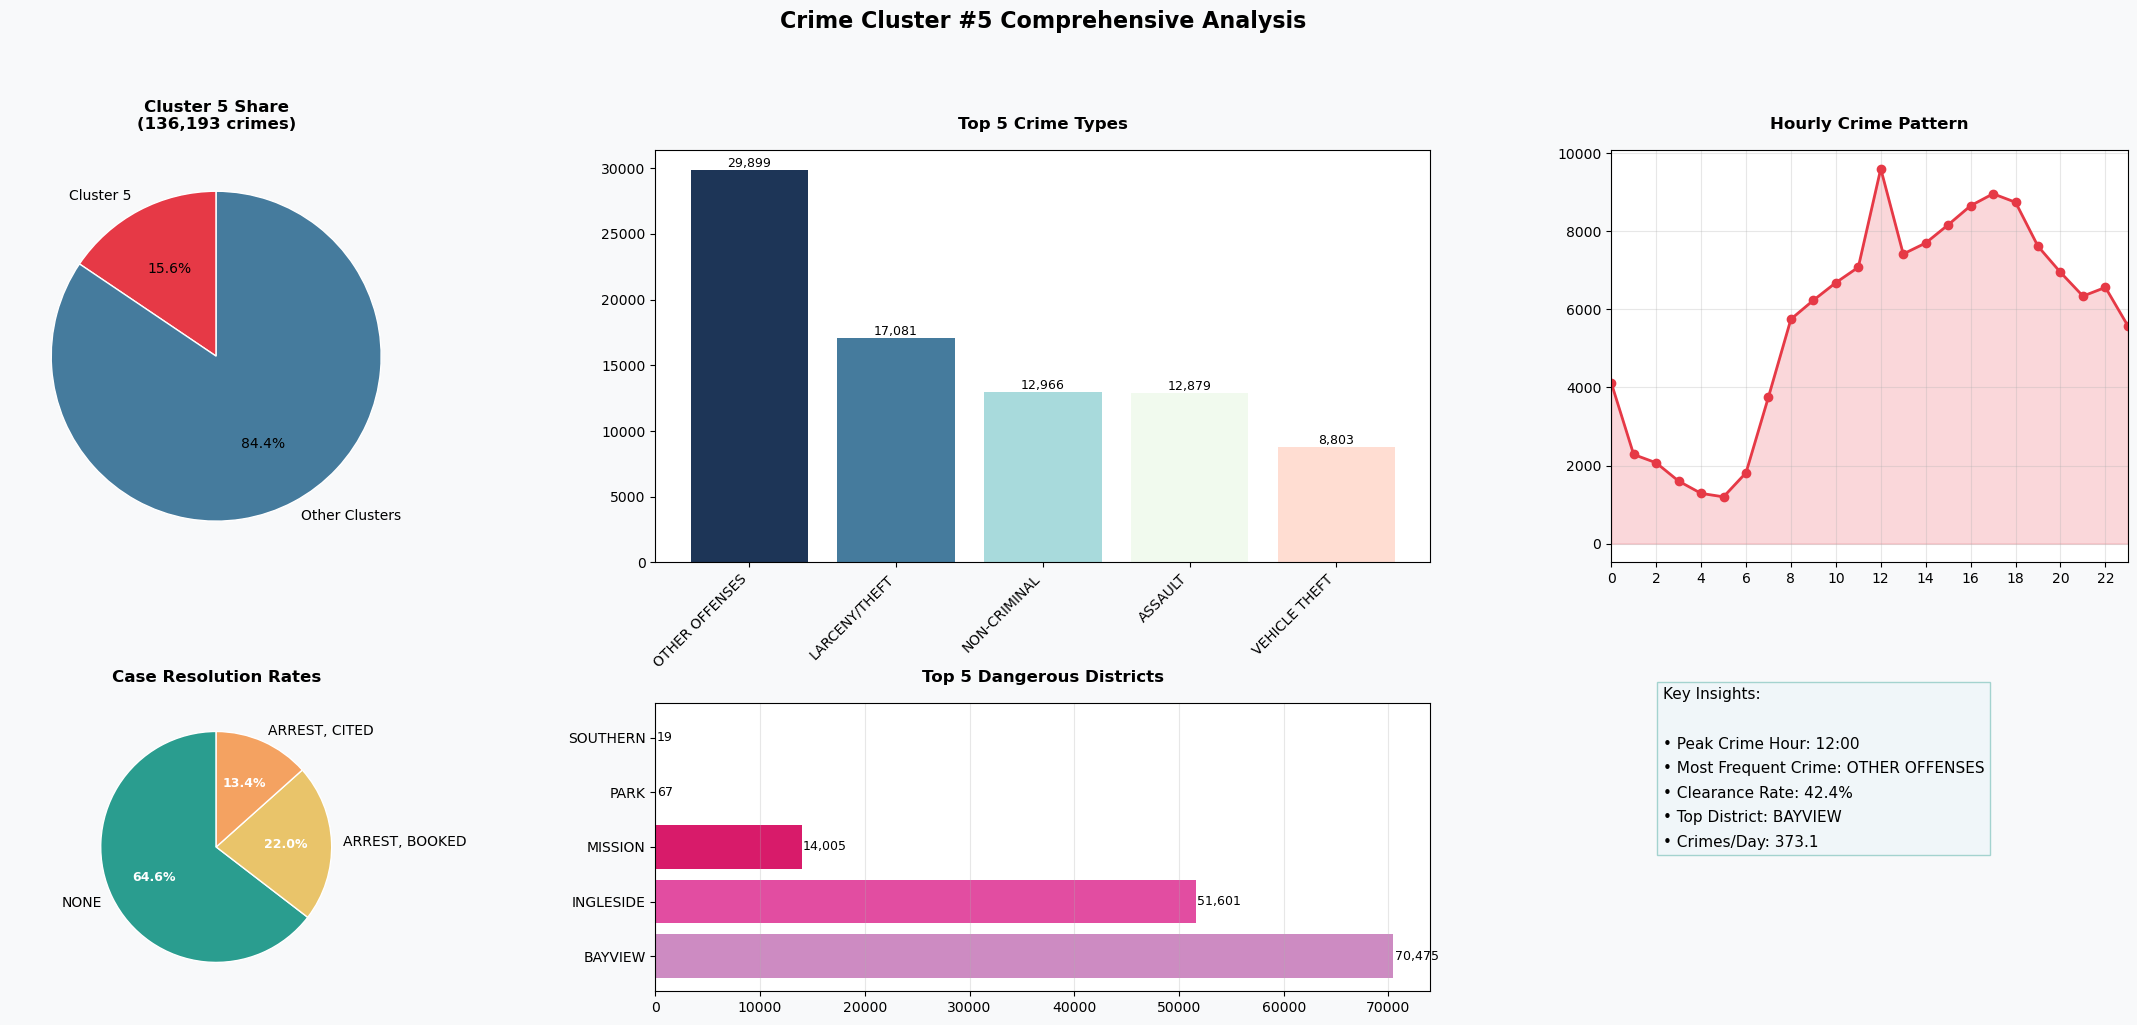

In [83]:
def analyze_cluster(cluster_num, cluster_data, total_crimes):
    fig = plt.figure(figsize=(22, 10), facecolor='#f8f9fa')
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 0.7], width_ratios=[1, 1.5, 1])
    
    palette = {
        'pie': ['#e63946', '#457b9d'],
        'bars': ['#1d3557', '#457b9d', '#a8dadc', '#f1faee', '#ffddd2'],
        'resolution': ['#2a9d8f', '#e9c46a', '#f4a261'],
        'districts': plt.cm.PuRd(np.linspace(0.4, 1, 5))
    }
    
    # Calculate metrics
    cluster_pct = (len(cluster_data)/total_crimes)*100
    top_crimes = cluster_data['Category'].value_counts().head(5)
    resolution_rates = cluster_data['Resolution'].value_counts(normalize=True).head(3)
    top_districts = cluster_data['PdDistrict'].value_counts().head(5)
    
    # 1. Pie Chart (Cluster Share)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.pie([cluster_pct, 100-cluster_pct],
            labels=[f'Cluster {cluster_num}', 'Other Clusters'],
            colors=palette['pie'],
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'linewidth':1, 'edgecolor':'white'})
    ax1.set_title(f'Cluster {cluster_num} Share\n({len(cluster_data):,} crimes)', 
                 fontsize=12, pad=15, fontweight='bold')
    
    # 2. Crime Type Distribution
    ax2 = fig.add_subplot(gs[0, 1])
    bars = ax2.bar(top_crimes.index, top_crimes.values, color=palette['bars'])
    ax2.set_title('Top 5 Crime Types', fontsize=12, pad=15, fontweight='bold')
    plt.sca(ax2)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:,}',
                ha='center', va='bottom', fontsize=9)
    


    # 3. Temporal Analysis
    ax3 = fig.add_subplot(gs[0, 2])
    hourly = cluster_data['Hour'].value_counts().sort_index()
    ax3.plot(hourly.index, hourly.values, 
            marker='o', color='#e63946', linewidth=2)
    ax3.fill_between(hourly.index, hourly.values, color='#e63946', alpha=0.2)
    ax3.set_title('Hourly Crime Pattern', fontsize=12, pad=15, fontweight='bold')
    ax3.set_xlim(0, 23)
    ax3.set_xticks(range(0, 24, 2))
    ax3.grid(alpha=0.3)
    


    # 4. Resolution Rates 
    ax4 = fig.add_subplot(gs[1, 0])
    wedges, texts, autotexts = ax4.pie(resolution_rates.values,
                                      labels=resolution_rates.index,
                                      colors=palette['resolution'],
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      wedgeprops={'linewidth':1, 'edgecolor':'white'})
    ax4.set_title('Case Resolution Rates', fontsize=12, pad=15, fontweight='bold')
    plt.setp(autotexts, size=9, color='white', fontweight='bold')
    



    # 5. Top Districts 
    ax5 = fig.add_subplot(gs[1, 1])
    dist_bars = ax5.barh(top_districts.index, top_districts.values, color=palette['districts'])
    ax5.set_title('Top 5 Dangerous Districts', fontsize=12, pad=15, fontweight='bold')
    ax5.grid(axis='x', alpha=0.3)
    
    # Add district labels
    for i, (district, count) in enumerate(zip(top_districts.index, top_districts.values)):
        ax5.text(count+100, i, f'{count:,}', va='center', fontsize=9)
    


    # 6. Stats Summary 
    ax6 = fig.add_subplot(gs[1, 2])
    ax6.axis('off')
    
    # Calculate summary stats
    peak_hour = hourly.idxmax()
    most_common_crime = top_crimes.index[0]
    clearance_rate = (1 - resolution_rates.get('NONE', 0))*100
    
    stats_text = (
        f"Key Insights:\n\n"
        f"• Peak Crime Hour: {peak_hour}:00\n"
        f"• Most Frequent Crime: {most_common_crime}\n"
        f"• Clearance Rate: {clearance_rate:.1f}%\n"
        f"• Top District: {top_districts.index[0]}\n"
        f"• Crimes/Day: {len(cluster_data)/365:.1f}"
    )
    
    ax6.text(0.1, 0.5, stats_text, 
            fontsize=11, linespacing=1.8,
            bbox=dict(facecolor='#edf6f9', alpha=0.7, edgecolor='#83c5be'))
    
    plt.suptitle(f'Crime Cluster #{cluster_num} Comprehensive Analysis', 
                fontsize=16, y=1.02, 
                fontweight='bold')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.88, hspace=0.4, wspace=0.3)
    
    return fig

for cluster_num in sorted(train_clean['Cluster'].unique()):
    cluster_data = train_clean[train_clean['Cluster'] == cluster_num]
    fig = analyze_cluster(cluster_num, cluster_data, len(train_clean))
    plt.show()

## Crime Type Prediction using Decision Tree

In [84]:
print(train_clean.shape[0])
print(train_clean.head())

875659
         Category                      Descript  DayOfWeek PdDistrict  \
0        WARRANTS                WARRANT ARREST  Wednesday   NORTHERN   
1  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

       Resolution                    Address           X          Y  Year  \
0  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  2015   
1  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  2015   
2  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363  37.800414  2015   
3            NONE   1500 Block of LOMBARD ST -122.426995  37.800873  2015   
4            NONE  100 Block of BRODERICK ST -122.438738  37.771541  2015   

   Month  Day  Hour  Minute  Second  X_outlier  Y_outlier  both_outlier  \
0      5   13   

In [85]:
# Cell 2.5: Take a sample of the dataset
train_clean = train_clean.sample(n=600000, random_state=42).reset_index(drop=True)

In [86]:
# Cell 3: Feature and target selection
features = ['DayOfWeek', 'PdDistrict', 'Hour']
target = 'Category'

X = train_clean[features]
y = train_clean[target]


In [87]:
# Cell 4: Encode categorical variables
le_day = LabelEncoder()
le_district = LabelEncoder()
le_target = LabelEncoder()

X['DayOfWeek'] = le_day.fit_transform(X['DayOfWeek'])
X['PdDistrict'] = le_district.fit_transform(X['PdDistrict'])
y = le_target.fit_transform(y)


C:\Users\NadaF\AppData\Local\Temp\ipykernel_29528\3823646283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DayOfWeek'] = le_day.fit_transform(X['DayOfWeek'])
C:\Users\NadaF\AppData\Local\Temp\ipykernel_29528\3823646283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PdDistrict'] = le_district.fit_transform(X['PdDistrict'])


In [88]:
# Cell 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
# Cell 6: Train Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [90]:
# Cell 7: Make predictions
y_pred_dt = dt_model.predict(X_test)


## Evaluation metrics

for prediction 

In [ ]:
# Cell 8: Evaluation metrics
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree - Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree - Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree - F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

for Hierarchical Clustering

In [99]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_train = silhouette_score(data_scaled_sample, sampled_df['Cluster'])
calinski_train = calinski_harabasz_score(data_scaled_sample, sampled_df['Cluster'])
davies_train = davies_bouldin_score(data_scaled_sample, sampled_df['Cluster'])

silhouette_test = silhouette_score(data_scaled_sample_test, sampled_test_df['Cluster'])
calinski_test = calinski_harabasz_score(data_scaled_sample_test, sampled_test_df['Cluster'])
davies_test = davies_bouldin_score(data_scaled_sample_test, sampled_test_df['Cluster'])

print("Hierarchical clustering evaluation:")
print(f"Training data- Silhouette: {silhouette_train:.3f}, Calinski-Harabasz: {calinski_train:.1f}, Davies-Bouldin: {davies_train:.3f}")
print(f"Test data- Silhouette: {silhouette_test:.3f}, Calinski-Harabasz: {calinski_test:.1f}, Davies-Bouldin: {davies_test:.3f}")

Hierarchical clustering evaluation:
Training data- Silhouette: 0.146, Calinski-Harabasz: 727.0, Davies-Bouldin: 1.789
Test data- Silhouette: 0.111, Calinski-Harabasz: 697.0, Davies-Bouldin: 2.001


for K-Medoids

In [100]:
final_kmedoids = KMedoids(n_clusters=best_k, method='pam', init='k-medoids++', random_state=42)
final_kmedoids.fit(sample_data)

silhouette_kmed = silhouette_score(sample_data, best_labels)
calinski_kmed = calinski_harabasz_score(sample_data, best_labels)
davies_kmed = davies_bouldin_score(sample_data, best_labels)

print("\nAlgorithm evaluationK-Medoids:")
print(f"Silhouette metric: {silhouette_kmed:.3f}")
print(f"Calinski-Harabasz Index: {calinski_kmed:.1f}")
print(f"Davies-Bouldin Index: {davies_kmed:.3f}")

cluster_counts = sample_df['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_counts)
print(f"Balance Score (min/max): {cluster_counts.min()/cluster_counts.max():.2f}")


Algorithm evaluationK-Medoids:
Silhouette metric: 0.223
Calinski-Harabasz Index: 1849.5
Davies-Bouldin Index: 1.262

Cluster Sizes:
Cluster
1    1651
0    1352
5    1073
4     978
2     976
3     970
Name: count, dtype: int64
Balance Score (min/max): 0.59


## visualization


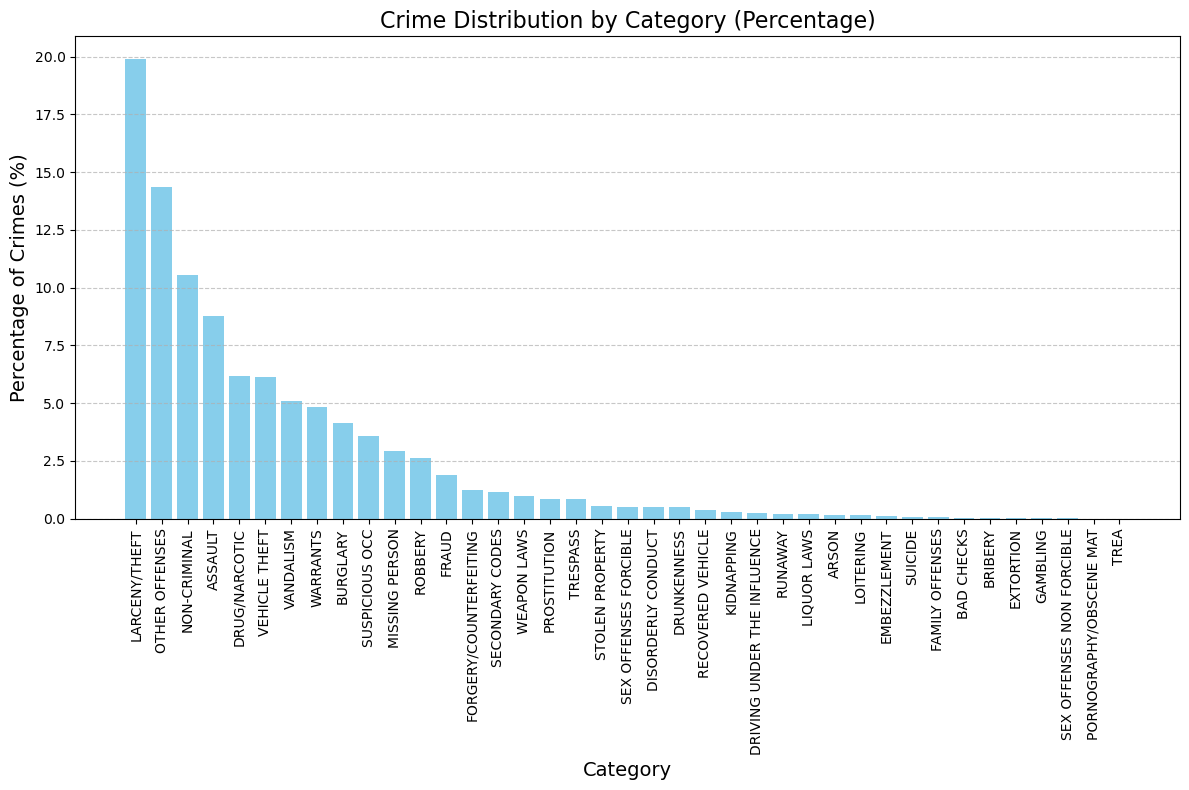

In [94]:
# Count the number of crimes per category and convert to percentages
category_counts = train_clean['Category'].value_counts(normalize=True) * 100

# Plot the Bar chart
plt.figure(figsize=(12, 8))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Crime Distribution by Category (Percentage)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Percentage of Crimes (%)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

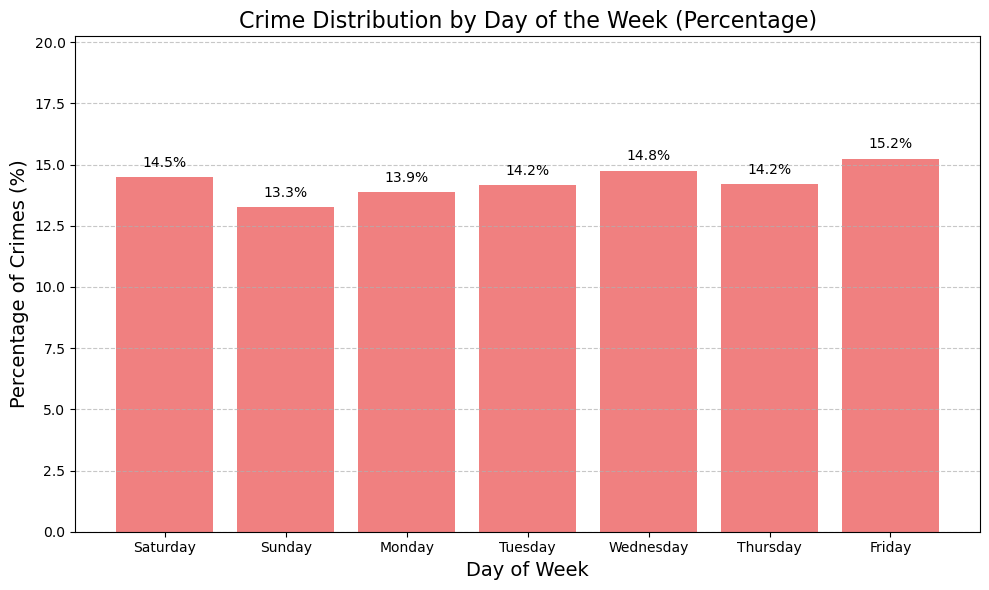

In [95]:
# Count the number of crimes per day of the week and convert to percentages
day_counts = train_clean['DayOfWeek'].value_counts(normalize=True) * 100

day_order = ['Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ]
day_counts = day_counts.reindex(day_order)

plt.figure(figsize=(10, 6))
bars = plt.bar(day_counts.index, day_counts.values, color='lightcoral')  # changed color
plt.title('Crime Distribution by Day of the Week (Percentage)', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Percentage of Crimes (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels above bars, slightly lower
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)  # adjusted +0.3

plt.ylim(0, day_counts.max() + 5)  # extend the y-axis limit so text won't be cut
plt.tight_layout()
plt.show()

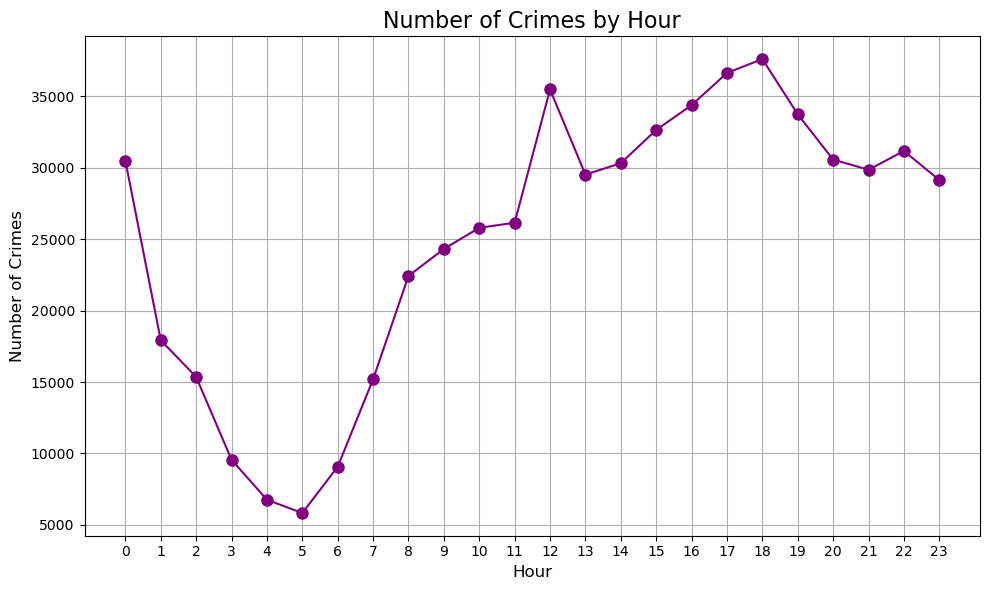

In [96]:
# Calculate the number of crimes for each hour
crime_counts_by_hour = train_clean.groupby('Hour').size()

# Plot the Line plot with modified colors and markers
plt.figure(figsize=(10, 6))
crime_counts_by_hour.plot(kind='line', marker='o', color='#800080', linestyle='-', markersize=8)  # Dark purple color and larger marker size
plt.title('Number of Crimes by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(0, 24))  # Display all hours from 0 to 23
plt.grid(True)
plt.tight_layout()
plt.show()

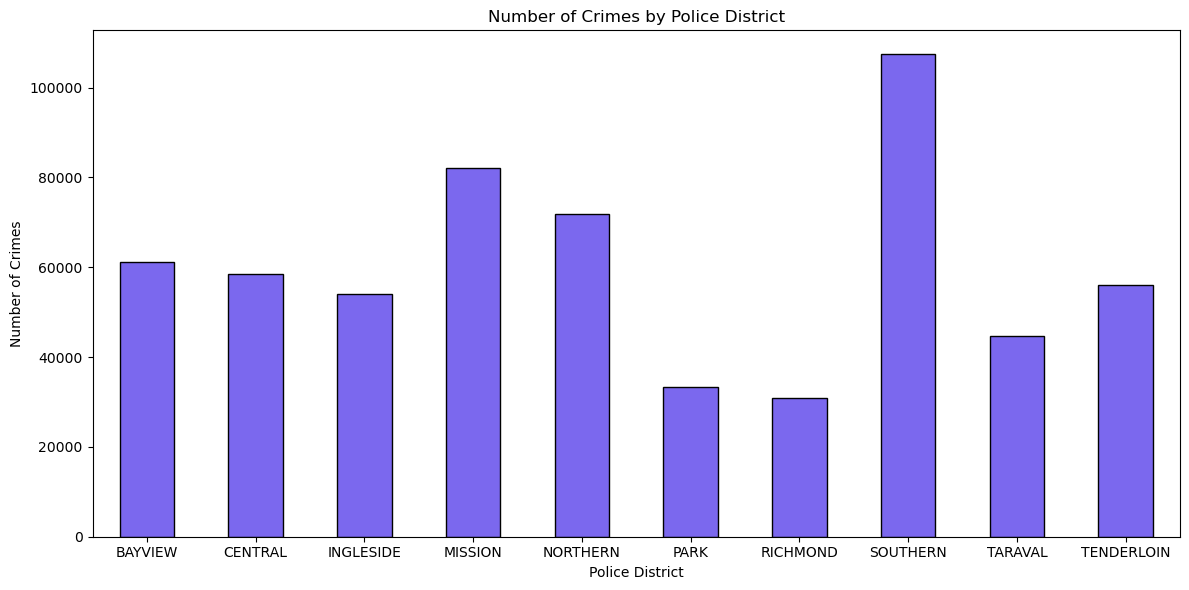

In [97]:
# Calculate the number of crimes for each Police District
crime_counts_by_district = train_clean.groupby('PdDistrict').size()

# Plot the Bar chart
plt.figure(figsize=(12, 6))
crime_counts_by_district.plot(kind='bar', color='mediumslateblue', edgecolor='black')
plt.title('Number of Crimes by Police District')
plt.xlabel('Police District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

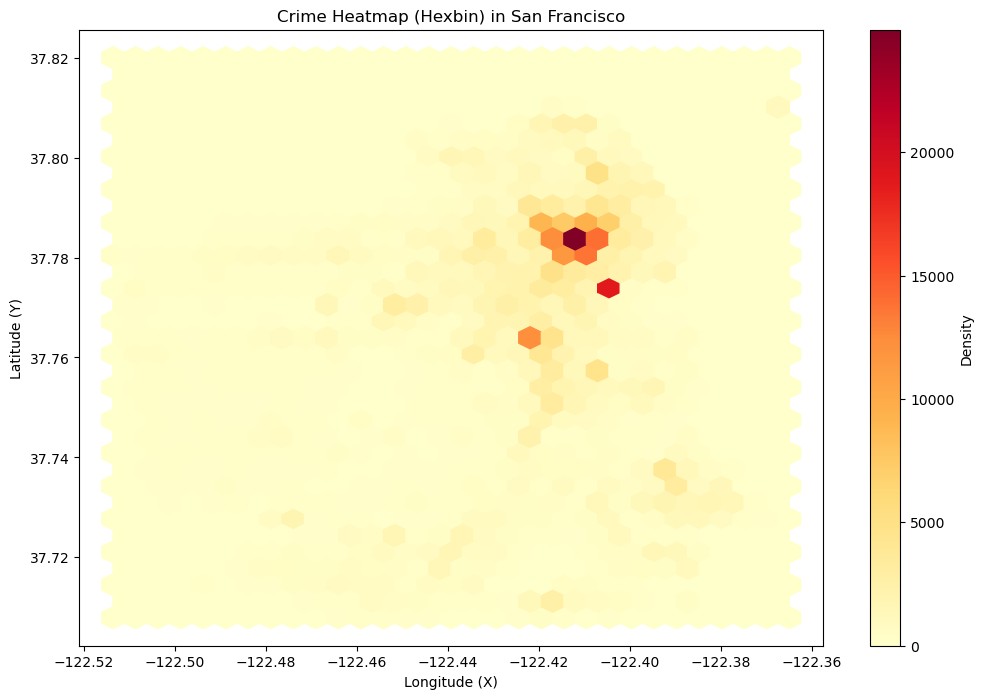

In [98]:
# Create hexbin plot (Heatmap with hexagonal bins)
plt.figure(figsize=(12, 8))

# Create hexbin plot
plt.hexbin(train_clean['X'], train_clean['Y'], gridsize=30, cmap='YlOrRd')

# Add a colorbar
plt.colorbar(label='Density')

# Set the title and labels
plt.title('Crime Heatmap (Hexbin) in San Francisco')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')

# Show the plot
plt.show()
